In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

В данном задании необходимо провести аналитику данного датасета, а также построить классификационную модель, определяющую, болен ли человек.

In [2]:
# подготовим заголовки колонок таблицы
col_names = ['age',
             'gender',
             'type of pain',
             'blood pressure',
             'cholesterol',
             'sugar level',
             'ECG result',
             'maximum heart rate',
             'angina pectoris during physical exertion',
             'ST depression on exertion / rest',
             'ST slope under load',
             'number of vessels',
             'thalassemia',
             'target predict class']

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Bostongene_Intern_test/dataset.csv", header = 0, names=col_names)
df.head

<bound method NDFrame.head of      age  gender  ...  thalassemia  target predict class
0     63       1  ...            1                     1
1     37       1  ...            2                     1
2     41       0  ...            2                     1
3     56       1  ...            2                     1
4     57       0  ...            2                     1
..   ...     ...  ...          ...                   ...
298   57       0  ...            3                     0
299   45       1  ...            3                     0
300   68       1  ...            3                     0
301   57       1  ...            3                     0
302   57       0  ...            2                     0

[303 rows x 14 columns]>

In [4]:
# признак "ST депрессия при нагрузке / при отдыхе" необходимо разделить на два отдельных признака
exertion_list = []
rest_list = []

for rows in df["ST depression on exertion / rest"]: # итерируемся по строкам в признаке
  rows = str(rows) # конвертируем float64 в string 
  
  # объявляем вспомогательные переменные для каждой строки таблицы
  exertion = ''
  rest = ''
  dot = False # точка еще не встречалась в строке

  for i in rows: # итерируемся по элементам строки
    if i != '.' and dot == False: # заполнение "при нагрузке"
      exertion += i
    elif i != '.' and dot == True: # заполнение "при отдыхе"
      rest += i
    elif i == '.': # отлавливаем точку через флаг dot
      dot = True
  
  # заполняем значения
  exertion_list.append(int(exertion)) 
  rest_list.append(int(rest))

# смотрим какие списки получились
print('exertion_list', exertion_list)
print('rest_list', rest_list)

exertion_list [2, 3, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 4, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 3, 1, 3, 0, 1, 1, 3, 2, 2, 1, 0, 2, 0, 1, 1, 0, 2, 2, 0, 1, 2, 0, 0, 1, 2, 1, 2, 3, 3, 3, 0, 1, 0, 0, 2, 0, 1, 6, 0, 1, 2, 2, 0, 0, 3, 1, 1, 1, 3, 1, 1, 2, 0, 4, 5, 1, 4, 2, 2, 1, 1, 0, 1, 0, 1, 0, 2, 2, 1, 0, 1, 0, 0, 2, 0, 2, 1, 2, 0, 1, 0, 0, 2, 4, 0, 1, 0, 0, 0, 3, 0, 1, 3, 1, 0, 2, 1, 0, 0, 3, 0, 3, 1, 0, 2, 1, 0, 1, 1, 2, 0, 0, 3, 1, 1, 2, 0, 1, 1, 0, 0, 3, 2, 0, 4, 2, 0, 2, 4, 0, 1, 0, 1, 3, 1, 0]
rest_list [3, 5, 4, 8, 6, 4, 3, 0, 5, 6, 2, 2, 6, 8, 0, 6, 0, 6, 5, 8, 5, 4,

In [5]:
df["ST depression on exertion"] = exertion_list
df["ST depression on rest"] = rest_list
df = df.drop(['ST depression on exertion / rest'], axis = 1)
df

,age,gender,type of pain,blood pressure,cholesterol,sugar level,ECG result,maximum heart rate,angina pectoris during physical exertion,ST slope under load,number of vessels,thalassemia,target predict class,ST depression on exertion,ST depression on rest
0,63,1,3,145,233,1,0,150,0,0,0,1,1,2,3
1,37,1,2,130,250,0,1,187,0,0,0,2,1,3,5
2,41,0,1,130,204,0,0,172,0,2,0,2,1,1,4
3,56,1,1,120,236,0,1,178,0,2,0,2,1,0,8
4,57,0,0,120,354,0,1,163,1,2,0,2,1,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,1,0,3,0,0,2
299,45,1,3,110,264,0,1,132,0,1,0,3,0,1,2
300,68,1,0,144,193,1,1,141,0,1,2,3,0,3,4
301,57,1,0,130,131,0,1,115,1,1,1,3,0,1,2


In [6]:
# смотрим наличие пропущенных данных в табличке
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   age                                       303 non-null    int64
 1   gender                                    303 non-null    int64
 2   type of pain                              303 non-null    int64
 3   blood pressure                            303 non-null    int64
 4   cholesterol                               303 non-null    int64
 5   sugar level                               303 non-null    int64
 6   ECG result                                303 non-null    int64
 7   maximum heart rate                        303 non-null    int64
 8   angina pectoris during physical exertion  303 non-null    int64
 9   ST slope under load                       303 non-null    int64
 10  number of vessels                         303 non-null    int6

Незаполненных значений не выявлено, все данные хранятся в оптимальном для них типе (int)

Чтобы найти корреляции между наличием заболевания у человека и другими признаками, построим матрицу корреляций.

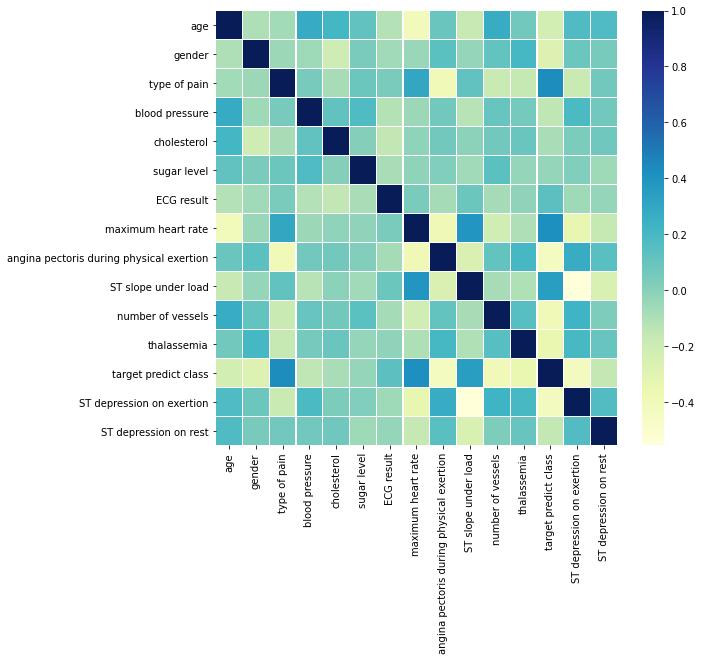

In [7]:
corrmat = df.corr()

f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.2)

Сильнее всего с наличием заболевания коррелируют (в порядке убывания) такие признаки, как:
* Тип боли
* Максимальный ЧСС
* Наклон ST при нагрузке

Далее необходимо проанализировать следующие пункты:
1. Кто чаще заболевает мужчины или женщины?
2. Выделите 2 возрастные группы (условно люди в возрасте и молодые). Кто
чаще заболевает и насколько.
3. Кто раньше заболевает мужчины или женщины?
4. Можно ли сказать, что с повышением максимального ЧСС растёт вероятность
наличия заболевания?

Примечание: в условии не было сказано, какой пол является "0" и "1" в предоставленных данных. \
 Будем считать, что: \
"0" - Мужской пол \
"1" - Женский пол

In [8]:
# выделим больных в отдельный датафрейм для аналитики
sick = df.loc[df['target predict class'] == 1]
sick

,age,gender,type of pain,blood pressure,cholesterol,sugar level,ECG result,maximum heart rate,angina pectoris during physical exertion,ST slope under load,number of vessels,thalassemia,target predict class,ST depression on exertion,ST depression on rest
0,63,1,3,145,233,1,0,150,0,0,0,1,1,2,3
1,37,1,2,130,250,0,1,187,0,0,0,2,1,3,5
2,41,0,1,130,204,0,0,172,0,2,0,2,1,1,4
3,56,1,1,120,236,0,1,178,0,2,0,2,1,0,8
4,57,0,0,120,354,0,1,163,1,2,0,2,1,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,56,1,1,120,240,0,1,169,0,0,0,2,1,0,0
161,55,0,1,132,342,0,1,166,0,2,0,2,1,1,2
162,41,1,1,120,157,0,1,182,0,2,0,2,1,0,0
163,38,1,2,138,175,0,1,173,0,2,4,2,1,0,0


Кто чаще заболевает мужчины или женщины?

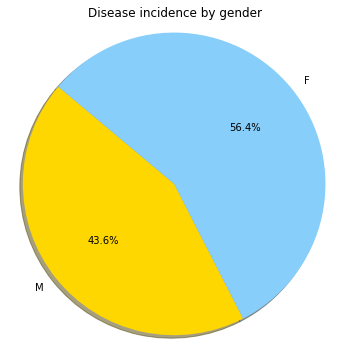

In [9]:
# Data to plot
labels = 'M', 'F'
genders = [sum(sick.gender == 0), sum(sick.gender == 1)]
colors = ['gold', 'lightskyblue']

# Plot
plt.figure(figsize = (6,6))
plt.pie(genders, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('Disease incidence by gender')
plt.axis('equal')
plt.show()

Исходя из построенного графика, можно сказать, что женщины (56,4%) подвержены заболеванию в большей степени, нежели мужчины (43,6%).

Выделите 2 возрастные группы (условно люди в возрасте и молодые). Кто чаще заболевает и насколько.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of cases by age')

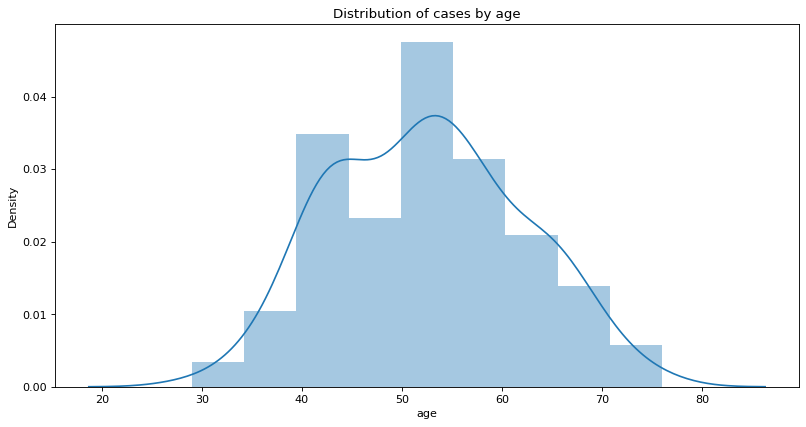

In [10]:
# построим распределение по возрасту
plt.figure(figsize=(12,6), dpi= 80)
sns_plot = sns.distplot(sick['age'])
fig = sns_plot.get_figure()
plt.title("Distribution of cases by age")

Из графика распределения заболеваемости можно увидеть, что в основном оно проявляется у людей в возрасте, нежели у молодежи.

In [11]:
# если считать молодежью лиц до 35 лет включительно, то можно узнать, во сколько раз молодежь заболевает меньше остальных
sum(sick.age <= 35) 

5

In [12]:
sum(sick.age > 35)

160

Значит молодежь заболевает в $160/5 = 32$ раза реже, нежели остальные люди.

Кто раньше заболевает мужчины или женщины?

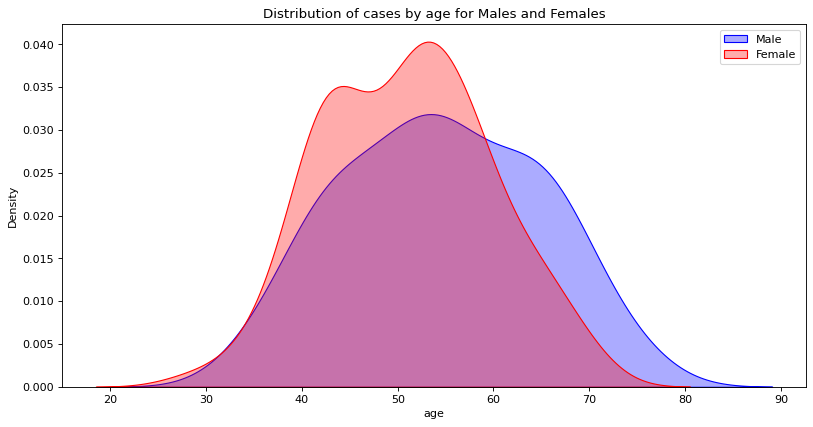

In [13]:
plt.figure(figsize=(12,6), dpi= 80)
sns.kdeplot(sick.loc[sick['gender'] == 0, 'age'], shade=True, color="b", label="Male", alpha = 0.33)
sns.kdeplot(sick.loc[sick['gender'] == 1, 'age'], shade=True, color="r", label="Female", alpha = 0.33)
plt.title("Distribution of cases by age for Males and Females")
plt.legend()

Как видно из диаграммы, распределения показывают, что в среднем женщины заболевают раньше мужчин.

Можно ли сказать, что с повышением максимального ЧСС растёт вероятность наличия заболевания?

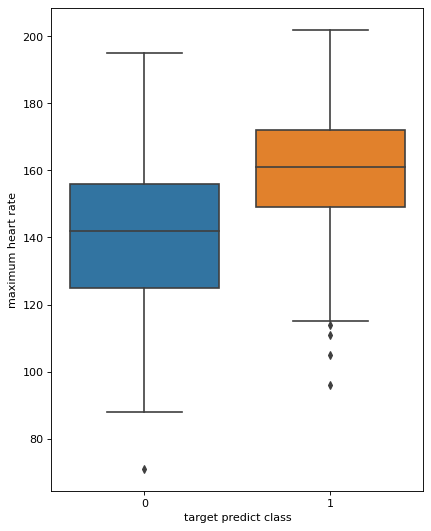

In [14]:
plt.figure(figsize=(6,8), dpi= 80)
sns.boxplot(x='target predict class', y='maximum heart rate', data=df, notch=False)

In [15]:
stats.ttest_ind(df[df['target predict class'] == 0]['age'], df[df['target predict class'] == 1]['age'])

Ttest_indResult(statistic=4.014560975148874, pvalue=7.524801303442373e-05)

p-value имеет порядок 10^-5 степени, что меньше 0,05 и говорит о наличии различия между двумя независимыми выборками. \
Делаем вывод, что чем выше максимальное ЧСС, тем вероятнеее у человека есть заболевание.

Построим модель классификации наличия заболевания.

In [16]:
# перемешаем строки в нашем датафрейме
df_shuffle = df.sample(frac=1)
df_shuffle

,age,gender,type of pain,blood pressure,cholesterol,sugar level,ECG result,maximum heart rate,angina pectoris during physical exertion,ST slope under load,number of vessels,thalassemia,target predict class,ST depression on exertion,ST depression on rest
231,57,1,0,165,289,1,0,124,0,1,3,3,0,1,0
86,68,1,2,118,277,0,1,151,0,2,1,3,1,1,0
177,64,1,2,140,335,0,1,158,0,2,0,2,0,0,0
135,49,0,0,130,269,0,1,163,0,2,0,2,1,0,0
36,54,0,2,135,304,1,1,170,0,2,0,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,40,1,0,152,223,0,1,181,0,2,0,3,0,0,0
67,45,0,1,130,234,0,0,175,0,1,0,2,1,0,6
144,76,0,2,140,197,0,2,116,0,1,0,2,1,1,1
87,46,1,1,101,197,1,1,156,0,2,0,3,1,0,0


In [17]:
# выделяем целевые классы
y = df_shuffle['target predict class'].to_numpy()

# выделяем фичи
features = df_shuffle.drop(labels=['target predict class'], axis=1)
X = features.to_numpy()

In [18]:
X

array([[57,  1,  0, ...,  3,  1,  0],
       [68,  1,  2, ...,  3,  1,  0],
       [64,  1,  2, ...,  2,  0,  0],
       ...,
       [76,  0,  2, ...,  2,  1,  1],
       [46,  1,  1, ...,  3,  0,  0],
       [42,  1,  0, ...,  2,  0,  0]])

In [19]:
y

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,

In [20]:
# сделаем разбивку на тестовую и тренировочную выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
# строим модели предсказания, а после сравниваем их:

# импортируем модели
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import ExtraTreeClassifier
import xgboost

In [22]:
# создадим модели для обучения с различными гиперпараметрами
clf1 = DecisionTreeClassifier(random_state = 101, max_depth = 5)
clf2 = KNeighborsClassifier(n_neighbors = 3)
clf3 = RandomForestClassifier(random_state = 1, max_depth = 25)
clf4 = GaussianNB()
clf5 = ExtraTreeClassifier(random_state = 3)
clf6 = DecisionTreeClassifier(random_state=8, max_depth = 12)
clf7 = xgboost.XGBClassifier(random_state = 228, max_depth = 50)

In [23]:
# сделаем предсказание на валидационной выборке и оценим его точность с помощью метрики ROC-AUC
# обучаем модели
clf1.fit(X_train,y_train)
print('clf1 - Done')
clf2.fit(X_train,y_train)
print('clf2 - Done')
clf3.fit(X_train,y_train)
print('clf3 - Done')
clf4.fit(X_train,y_train)
print('clf4 - Done')
clf5.fit(X_train,y_train)
print('clf5 - Done')
clf6.fit(X_train,y_train)
print('clf6 - Done')
clf7.fit(X_train,y_train)
print('clf7 - Done')

clf1 - Done
clf2 - Done
clf3 - Done
clf4 - Done
clf5 - Done
clf6 - Done
clf7 - Done


In [24]:
# делаем предсказания для валидационной выборки
y_pred_clf1 = clf1.predict_proba(X_test)[:, 1]
y_pred_clf2 = clf2.predict_proba(X_test)[:, 1]
y_pred_clf3 = clf3.predict_proba(X_test)[:, 1]
y_pred_clf4 = clf4.predict_proba(X_test)[:, 1]
y_pred_clf5 = clf5.predict_proba(X_test)[:, 1]
y_pred_clf6 = clf6.predict_proba(X_test)[:, 1]
y_pred_clf7 = clf7.predict_proba(X_test)[:, 1]

y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)
y_pred3 = clf3.predict(X_test)
y_pred4 = clf4.predict(X_test)
y_pred5 = clf5.predict(X_test)
y_pred6 = clf6.predict(X_test)
y_pred7 = clf7.predict(X_test)

In [25]:
# оцениваем результат предсказания 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

print('Результаты:')
print('------------------------------------')
print('clf1 - DecisionTreeClassifier(random_state=101, max_depth = 5)')
print(f'ROC-AUC score: {roc_auc_score(y_test, y_pred_clf1):.3f}, F1 score: {f1_score(y_test, y_pred1):.3f}, Accuracy score: {accuracy_score(y_test, y_pred1):.3f}')
print('----')
print('clf2 - KNeighborsClassifier(n_neighbors = 3)')
print(f'ROC-AUC score: {roc_auc_score(y_test, y_pred_clf2):.3f}, F1 score: {f1_score(y_test, y_pred2):.3f}, Accuracy score: {accuracy_score(y_test, y_pred2):.3f}')
print('----')
print('clf3 - RandomForestClassifier(random_state=1, max_depth = 25)')
print(f'ROC-AUC score: {roc_auc_score(y_test, y_pred_clf3):.3f}, F1 score: {f1_score(y_test, y_pred3):.3f}, Accuracy score: {accuracy_score(y_test, y_pred3):.3f}')
print('----')
print('clf4 - GaussianNB()')
print(f'ROC-AUC score: {roc_auc_score(y_test, y_pred_clf4):.3f}, F1 score: {f1_score(y_test, y_pred4):.3f}, Accuracy score: {accuracy_score(y_test, y_pred4):.3f}')
print('----')
print('clf5 - ExtraTreeClassifier(random_state = 3)')
print(f'ROC-AUC score: {roc_auc_score(y_test, y_pred_clf5):.3f}, F1 score: {f1_score(y_test, y_pred5):.3f}, Accuracy score: {accuracy_score(y_test, y_pred5):.3f}')
print('----')
print('clf6 - DecisionTreeClassifier(random_state=8, max_depth = 12)')
print(f'ROC-AUC score: {roc_auc_score(y_test, y_pred_clf6):.3f}, F1 score: {f1_score(y_test, y_pred6):.3f}, Accuracy score: {accuracy_score(y_test, y_pred6):.3f}')
print('----')
print('clf7 - xgboost.XGBClassifier(random_state = 228, max_depth = 50)')
print(f'ROC-AUC score: {roc_auc_score(y_test, y_pred_clf7):.3f}, F1 score: {f1_score(y_test, y_pred7):.3f}, Accuracy score: {accuracy_score(y_test, y_pred7):.3f}')


Результаты:
------------------------------------
clf1 - DecisionTreeClassifier(random_state=101, max_depth = 5)
ROC-AUC score: 0.859, F1 score: 0.787, Accuracy score: 0.780
----
clf2 - KNeighborsClassifier(n_neighbors = 3)
ROC-AUC score: 0.711, F1 score: 0.718, Accuracy score: 0.681
----
clf3 - RandomForestClassifier(random_state=1, max_depth = 25)
ROC-AUC score: 0.926, F1 score: 0.869, Accuracy score: 0.857
----
clf4 - GaussianNB()
ROC-AUC score: 0.913, F1 score: 0.848, Accuracy score: 0.835
----
clf5 - ExtraTreeClassifier(random_state = 3)
ROC-AUC score: 0.780, F1 score: 0.800, Accuracy score: 0.780
----
clf6 - DecisionTreeClassifier(random_state=8, max_depth = 12)
ROC-AUC score: 0.721, F1 score: 0.723, Accuracy score: 0.714
----
clf7 - xgboost.XGBClassifier(random_state = 228, max_depth = 50)
ROC-AUC score: 0.928, F1 score: 0.839, Accuracy score: 0.835


Мы построили несколько классификаторов для данной задачи. \
По результатам метрик видно, что лучше всех с задачей классификации справились XGBoost и RandomForest.